In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
df=data.copy()

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


* Rating should be in range of 1 - 5.
* Review should be greater than 0.
* Size has values like 19m (19 MegaByte) it can also contain k for KiloByte need to change the scale of these type of data.
* In installs column data is not in integers type need to clean and change its type, If install has 0 values than respective       that app rating and review should be 0.
* Type and price are related to each other, if type is free then price should be 0. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df["Reviews"].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [7]:
df["Reviews"]=df["Reviews"].replace("3.0M","3000000")

In [8]:
df["Reviews"]=df["Reviews"].astype("int64")

In [9]:
df["Reviews"].dtype

dtype('int64')

In [10]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [11]:
df["Size"][df["Size"]=="Varies with device"].value_counts()

Varies with device    1695
Name: Size, dtype: int64

In [12]:
df["Size"]=df["Size"].replace("Varies with device","0")

In [13]:
df=df[df["Size"]!="1,000+"]

In [14]:
ls=[]
for i in df["Size"]:
    if i[-1]=="M":
        ls.append(float(i.replace("M",""))*1024)
    elif i[-1]=="k":
        ls.append(float(i.replace("k","")))
    else:
        ls.append(float(i))

In [15]:
len(ls)==len(df)

True

In [16]:
df["Size"] = np.array(ls)

In [17]:
df["Size"].dtype

dtype('float64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [19]:
df = df[df["Size"]!=0]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          7729 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   object 
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   object 
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
 10  Last Updated    9145 non-null   object 
 11  Current Ver     9137 non-null   object 
 12  Android Ver     9143 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1000.2+ KB


In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df[df["Size"]<100].shape

(50, 13)

In [23]:
df = df[df["Size"]>100]

In [24]:
df.shape

(9095, 13)

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
df["Installs"] = df["Installs"].str.replace("+","")
df["Installs"] = df["Installs"].str.replace(",","")

C:\Users\shreesai\AppData\Local\Temp\ipykernel_1848\3108499856.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Installs"] = df["Installs"].str.replace("+","")


In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
df["Type"].value_counts()

Free    8388
Paid     707
Name: Type, dtype: int64

In [29]:
df["Price"].value_counts()

0         8388
$0.99      141
$2.99      112
$1.99       65
$4.99       61
          ... 
$19.90       1
$1.75        1
$14.00       1
$4.85        1
$1.04        1
Name: Price, Length: 86, dtype: int64

In [30]:
df["Price"].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$3.99', '$7.99', '$5.99', '$2.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$5.00',
       '$13.99', '$299.99', '$379.99', '$37.99', '$18.99', '$389.99',
       '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99', '$109.99',
       '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96', '$19.40',
       '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [31]:
df["Price"]=df["Price"].str.replace("$","")

C:\Users\shreesai\AppData\Local\Temp\ipykernel_1848\2278851203.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"]=df["Price"].str.replace("$","")


In [32]:
df["Price"]=df["Price"].astype("float")

In [33]:
df["Installs"] = df["Installs"].astype("int64")

In [34]:
df["Content Rating"].value_counts()

Everyone           7367
Teen                987
Mature 17+          406
Everyone 10+        331
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64

In [35]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulat

In [36]:
df["Category"].value_counts()

FAMILY                 1830
GAME                   1015
TOOLS                   724
MEDICAL                 433
BUSINESS                396
PERSONALIZATION         351
LIFESTYLE               344
SPORTS                  311
FINANCE                 306
PRODUCTIVITY            299
HEALTH_AND_FITNESS      264
COMMUNICATION           258
PHOTOGRAPHY             253
NEWS_AND_MAGAZINES      215
DATING                  211
SOCIAL                  210
SHOPPING                199
BOOKS_AND_REFERENCE     196
TRAVEL_AND_LOCAL        191
VIDEO_PLAYERS           130
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       79
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

In [37]:
df["Last Updated"].value_counts().sort_values()

March 23, 2014         1
July 2, 2014           1
November 22, 2013      1
August 21, 2015        1
June 27, 2012          1
                    ... 
July 30, 2018        140
August 1, 2018       185
August 2, 2018       188
July 31, 2018        204
August 3, 2018       212
Name: Last Updated, Length: 1333, dtype: int64

In [38]:
df["Current Ver"].value_counts()

1.0          797
1.1          258
1.2          177
2.0          150
1.3          145
            ... 
1.16.2         1
0.81 beta      1
5.4.4          1
1.2.1.49       1
2.0.148.0      1
Name: Current Ver, Length: 2706, dtype: int64

In [39]:
df["Android Ver"].value_counts()

4.1 and up            2315
4.0.3 and up          1450
4.0 and up            1347
4.4 and up             910
2.3 and up             630
5.0 and up             556
4.2 and up             370
2.3.3 and up           274
3.0 and up             241
2.2 and up             233
4.3 and up             231
2.1 and up             130
1.6 and up             108
6.0 and up              57
Varies with device      55
7.0 and up              39
3.2 and up              36
2.0 and up              28
5.1 and up              23
1.5 and up              14
4.4W and up             12
3.1 and up               9
2.0.1 and up             7
8.0 and up               6
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 8.0                2
7.1 and up               1
4.1 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9095 entries, 0 to 9144
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9095 non-null   object 
 1   Category        9095 non-null   object 
 2   Rating          7685 non-null   float64
 3   Reviews         9095 non-null   int64  
 4   Size            9095 non-null   float64
 5   Installs        9095 non-null   int64  
 6   Type            9095 non-null   object 
 7   Price           9095 non-null   float64
 8   Content Rating  9095 non-null   object 
 9   Genres          9095 non-null   object 
 10  Last Updated    9095 non-null   object 
 11  Current Ver     9088 non-null   object 
 12  Android Ver     9093 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 994.8+ KB


# Statistics Analysis

In [41]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7685.000000,9.095000e+03,9095.000000,9.095000e+03,9095.000000
mean,4.174652,2.503741e+05,22153.407301,7.150647e+06,1.185639
std,0.545139,1.720828e+06,23137.060501,4.631760e+07,17.402973
min,1.000000,0.000000e+00,103.000000,0.000000e+00,0.000000
25%,4.000000,2.200000e+01,5120.000000,1.000000e+03,0.000000
50%,4.300000,7.570000e+02,13312.000000,1.000000e+05,0.000000
75%,4.500000,2.543250e+04,30720.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,102400.000000,1.000000e+09,400.000000


In [42]:
df[["Installs", "Rating", "Reviews"]][df["Installs"]==0]

,Installs,Rating,Reviews
3305,0,NaN,0
4052,0,NaN,0
4213,0,NaN,0
4611,0,NaN,0
5296,0,NaN,0
5990,0,NaN,0
6603,0,NaN,0
7089,0,NaN,0
7324,0,NaN,0
7760,0,NaN,0


In [43]:
df["Rating"].isna().sum()

1410

In [44]:
df["Rating"]=df["Rating"].fillna(0)

In [45]:
df[["Installs", "Rating", "Reviews"]][df["Installs"]==0]

,Installs,Rating,Reviews
3305,0,0.0,0
4052,0,0.0,0
4213,0,0.0,0
4611,0,0.0,0
5296,0,0.0,0
5990,0,0.0,0
6603,0,0.0,0
7089,0,0.0,0
7324,0,0.0,0
7760,0,0.0,0


In [46]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9095.000000,9.095000e+03,9095.000000,9.095000e+03,9095.000000
mean,3.527455,2.503741e+05,22153.407301,7.150647e+06,1.185639
std,1.591952,1.720828e+06,23137.060501,4.631760e+07,17.402973
min,0.000000,0.000000e+00,103.000000,0.000000e+00,0.000000
25%,3.600000,2.200000e+01,5120.000000,1.000000e+03,0.000000
50%,4.200000,7.570000e+02,13312.000000,1.000000e+05,0.000000
75%,4.500000,2.543250e+04,30720.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,102400.000000,1.000000e+09,400.000000


# Visualization

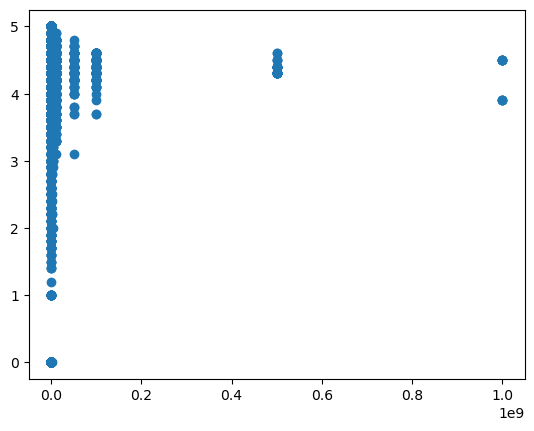

In [47]:
plt.scatter(df["Installs"], df["Rating"])
plt.show()

<Axes: >

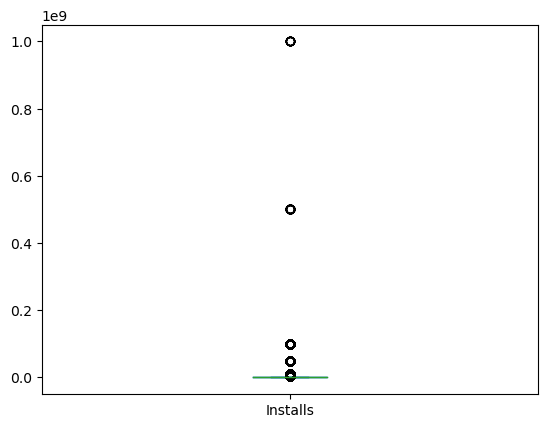

In [48]:
df["Installs"].plot.box()

In [49]:
df["Installs"].quantile([0.8, 0.9, 0.92, 0.95, 0.97, 0.99])

0.80      1000000.0
0.90     10000000.0
0.92     10000000.0
0.95     10000000.0
0.97     50000000.0
0.99    100000000.0
Name: Installs, dtype: float64

<Axes: >

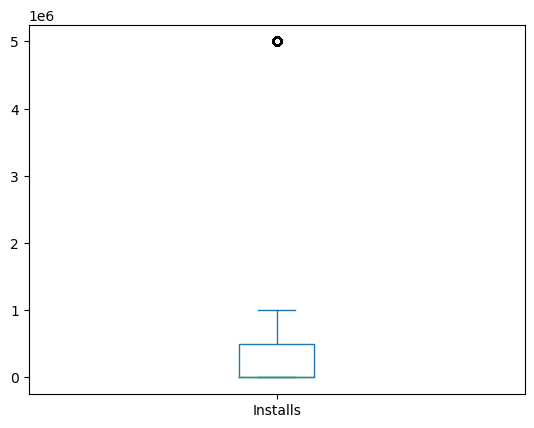

In [50]:
df["Installs"][df["Installs"]<df["Installs"].quantile(0.90)].plot.box()

In [51]:
df = df[df["Installs"]<df["Installs"].quantile(0.90)]

In [52]:
df.shape

(7884, 13)

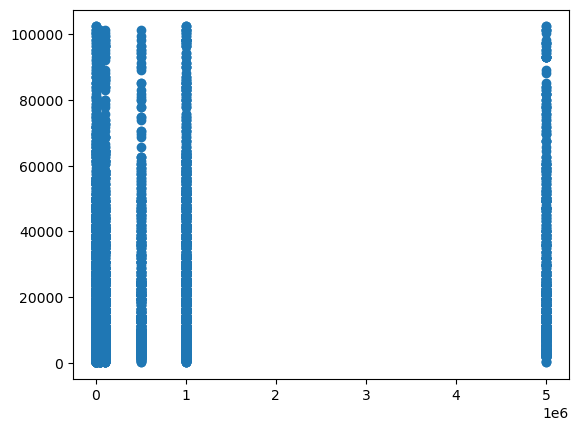

In [53]:
plt.scatter(df["Installs"], df["Size"])
plt.show()

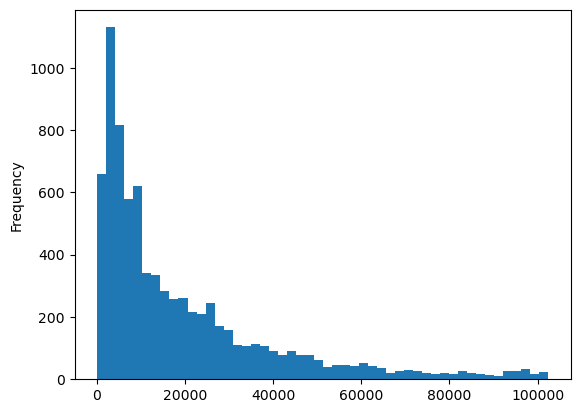

In [54]:
df["Size"].plot.hist(bins=50)
plt.show()

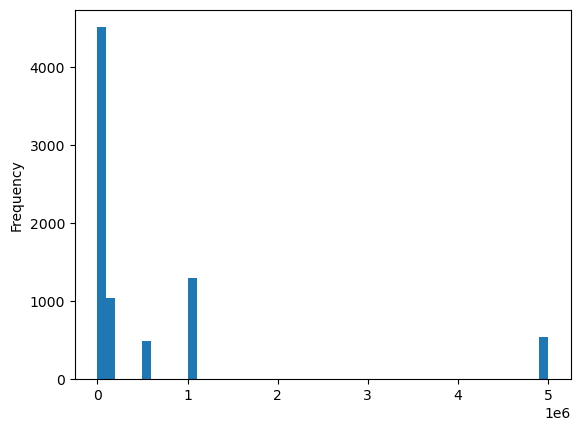

In [55]:
df["Installs"].plot.hist(bins=50)
plt.show()

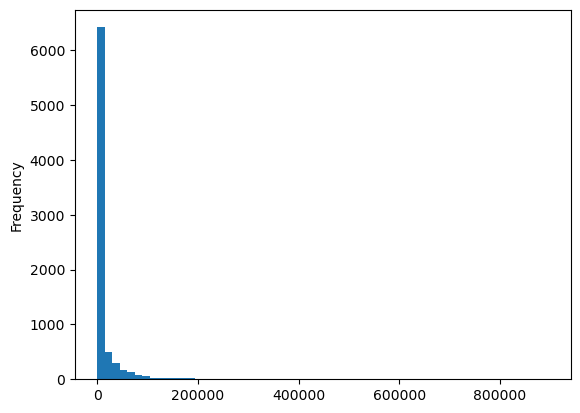

In [56]:
df["Reviews"].plot.hist(bins= 60)
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884 entries, 0 to 9143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7884 non-null   object 
 1   Category        7884 non-null   object 
 2   Rating          7884 non-null   float64
 3   Reviews         7884 non-null   int64  
 4   Size            7884 non-null   float64
 5   Installs        7884 non-null   int64  
 6   Type            7884 non-null   object 
 7   Price           7884 non-null   float64
 8   Content Rating  7884 non-null   object 
 9   Genres          7884 non-null   object 
 10  Last Updated    7884 non-null   object 
 11  Current Ver     7877 non-null   object 
 12  Android Ver     7882 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 862.3+ KB


In [58]:
df[["App","Rating", "Installs"]][df["Rating"]>0].sort_values("Rating").head()

,App,Rating,Installs
8907,Lottery Ticket Checker - Florida Results & Lotto,1.0,500
7275,DS Creator 2.0,1.0,500
3901,Clarksburg AH,1.0,50
6343,CR Magazine,1.0,100
8651,FE Mechanical Engineering Prep,1.0,1000


In [59]:
df[["App","Rating","Installs"]].sort_values(["Installs", "Rating"], ascending=False).head()

,App,Rating,Installs
923,Lose Belly Fat in 30 Days - Flat Stomach,4.9,5000000
65,Fines of the State Traffic Safety Inspectorate...,4.8,5000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5000000
569,English with Lingualeo,4.7,5000000
608,Free english course,4.7,5000000


In [60]:
df[["App","Reviews","Installs"]].sort_values("Reviews", ascending=False).head()

,App,Reviews,Installs
3105,"Fame Boom for Real Followers, Likes",896118,5000000
1391,FINAL FANTASY BRAVE EXVIUS,745684,5000000
8199,Castle Clash: Epic Empire ES,584070,5000000
4253,"Egg, Inc.",580160,5000000
8380,ETERNITY WARRIORS 2,568391,5000000


In [61]:
df[["App", "Price"]].sort_values("Price", ascending=False).head()

,App,Price
3214,I'm Rich - Trump Edition,400.00
4103,I am rich (Most expensive app),399.99
4101,I Am Rich Pro,399.99
4098,I am rich(premium),399.99
4097,I am Rich!,399.99


In [62]:
cat = df.groupby("Category")

In [63]:
categoty_df = cat.mean("Rating")

In [64]:
categoty_df

,Rating,Reviews,Size,Installs,Price
Category,,,,,
ART_AND_DESIGN,4.125862,7378.275862,11776.000000,3.334155e+05,0.102931
AUTO_AND_VEHICLES,3.461644,7311.698630,20266.230137,3.256193e+05,0.157260
BEAUTY,3.378723,3975.659574,14126.842553,2.914245e+05,0.000000
BOOKS_AND_REFERENCE,3.100000,7433.478723,13592.054255,3.136281e+05,0.621170
BUSINESS,2.457330,4694.929319,14640.234555,2.249151e+05,0.450995
COMICS,3.968627,12082.235294,13808.505882,3.448265e+05,0.000000
COMMUNICATION,3.032075,14527.721698,11160.897170,6.681205e+05,0.283962
DATING,3.215610,11580.551220,17166.236098,3.994181e+05,0.099805
EDUCATION,4.335417,37965.375000,21088.604167,1.341688e+06,0.187083


In [65]:
cont = df.groupby("Content Rating")

In [66]:
content_rating_df = cont.mean("Rating")

In [67]:
content_rating_df

,Rating,Reviews,Size,Installs,Price
Content Rating,,,,,
Adults only 18+,4.550000,37011.000000,23500.800000,750000.000000,0.000000
Everyone,3.354633,10936.604633,17960.834244,497957.867137,1.516915
Everyone 10+,3.937168,34676.207965,33703.646018,828189.115044,0.618230
Mature 17+,3.626934,17581.515759,23492.004011,579825.724928,0.298395
Teen,3.560864,30308.931385,27829.527319,912793.860229,0.827560
Unrated,2.050000,593.500000,4556.800000,25250.000000,0.000000


In [68]:
gen=df.groupby("Genres")

In [69]:
Genres_df=gen.mean("Rating")

In [70]:
Genres_df

,Rating,Reviews,Size,Installs,Price
Genres,,,,,
Action,4.093103,46909.320197,47403.269951,1.157335e+06,0.405271
Action;Action & Adventure,4.345455,33922.000000,57250.909091,2.547318e+06,0.815455
Adventure,4.091379,19732.982759,36542.675862,4.602640e+05,0.928966
Adventure;Action & Adventure,4.250000,25558.000000,14540.800000,1.537500e+06,2.495000
Adventure;Brain Games,4.600000,7148.000000,8294.400000,1.000000e+05,2.990000
...,...,...,...,...,...
Video Players & Editors,3.348000,7200.770000,14796.078000,4.676772e+05,0.009900
Video Players & Editors;Creativity,4.100000,159620.500000,23552.000000,5.000000e+06,0.000000
Video Players & Editors;Music & Video,4.000000,39779.000000,19456.000000,5.000000e+06,0.000000


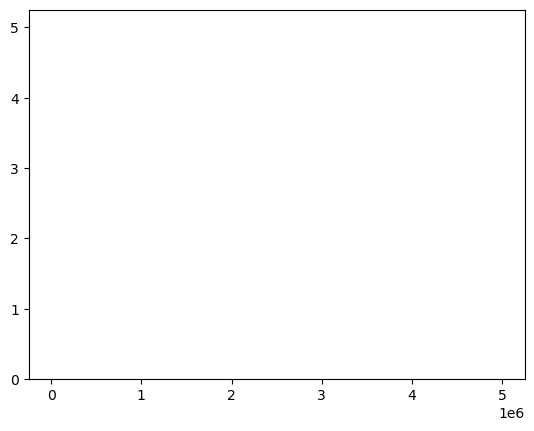

In [88]:
plt.bar(df["Installs"],df["Rating"])
plt.show()

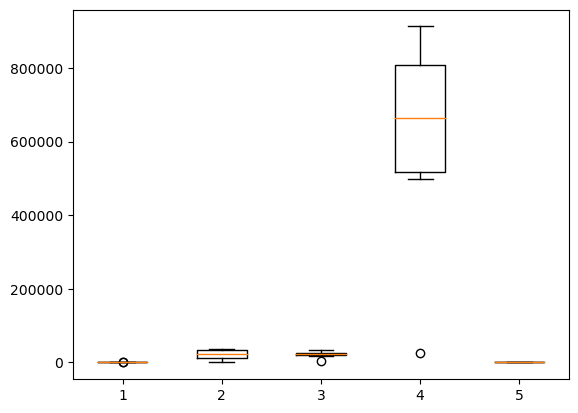

In [83]:
plt.boxplot(content_rating_df)
plt.show()